# Домашнее задание 4

$\begin{align}
& (1\ балл)\ 1.\ Сгенерируйте \ датасет\ из\ 500\ точек\ на\ плоскости,\ для\ которых\ y = 0.5x + 1 + \epsilon,\ где\ \epsilon \sim \mathcal{N}(0, 0.2) \\
&(воспользуйтесь\ модулем\ numpy.random)\end{align}$

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [5]:
np.random.normal(0, 0.2)

-0.22640790626321505

In [7]:
# your code here
np.random.uniform(2, 8, (2, 10))

array([[7.91073381, 6.92640462, 6.13150287, 2.97210507, 6.54578067,
        4.76946175, 4.30776223, 6.69209085, 2.24696965, 6.27207136],
       [3.24558655, 2.44317812, 4.74846954, 6.84386103, 5.61369583,
        6.18413202, 5.52994316, 6.54984686, 2.72526212, 2.92959654]])

In [8]:
dataset_x = np.random.randn(500)
dataset_y = dataset_x * 0.5 + 1 + np.random.normal(0, 0.2)

In [9]:
dataset_x[:5], dataset_y[:5]

(array([ 0.38785953, -0.1364279 , -0.72399431,  0.71171296,  0.65858487]),
 array([1.30705901, 1.0449153 , 0.75113209, 1.46898573, 1.44242168]))

$\begin{align}
& (1\ балл)\ 2.\ Визуализируйте\ выборку
\end{align}$

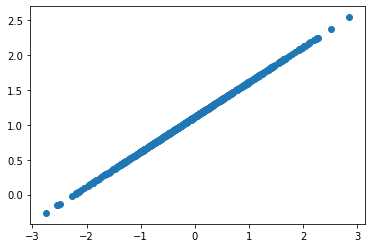

In [10]:
# your code here
plt.scatter(dataset_x, dataset_y)

$\begin{align}
&(2\ балла)\ 3.\ Восстановите\ по\ выборке\ зависимость\ y(x),\ считая,\ что\ зависимость\ имеет\ вид\ y\ =\ ax+b,
и\ минимизируя\\ & среднеквадратическое\ отклонение\ на\ обучающей\  выборке,\ воспользовавшись\ scipy.optimize.minimize. \\
& Визуализируйте\ восстановленную\ прямую.
\end{align}$

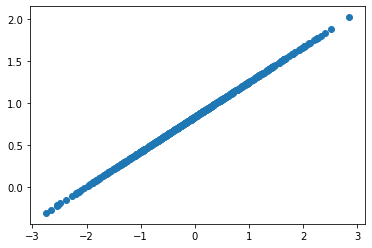

In [17]:
# your code here
def sko(params):
    a, b = params
    predict_y = a*dataset_x+b
    return ((dataset_y - predict_y)**2).sum()

initial_guess = np.array([0, 0])

result = scipy.optimize.minimize(sko, initial_guess)

plt.scatter(dataset_x, result.x[0]*dataset_x + result.x[1])

In [18]:
result

      fun: 315.594658675998
 hess_inv: array([[0.0010886 , 0.00108861],
       [0.00108861, 0.00108862]])
      jac: array([7.62939453e-06, 1.52587891e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 53
      nit: 6
     njev: 13
   status: 2
  success: False
        x: array([0.41371342, 0.83451791])

$
\begin{align}
& (2\ балла)\ 4.\ Добавьте\ теперь\ в\ выборку\ 75\ точек,\ для\ которых\ y = -1 + \epsilon ,\ а\ x\ принимает\ различные\ 
значения\ из\ того\ же\ диапазона,\\ &  что\ и\ у\ уже\ имевшихся\ точек\ в\ обучающей\ выборке.\ По\ новой\ расширенной\ выборке\ снова\ попробуйте\ восстановить\\ & зависимость\ y(x) = ax + b\ 
двумя\ способами:\\ & \cdot минимизируя\ среднеквадратическое\ отклонение\ и\\ & \cdot минимизируя\ среднее\ абсолютное\ отклонение.\\ & Визуализируйте\ полученные\ 
прямые\ и\ сгенерированный\ датасет\ на\ одном\ изображении.
\end{align}$

In [19]:
# your code here
dataset_y = np.append(dataset_y, np.array([-1 + np.random.normal(0, 0.2) for x in range(75)]))
dataset_x = np.append(dataset_x, np.random.randn(75))

In [20]:
def abso(params):
    a, b = params
    predict_y = a * dataset_x + b
    return (abs(predict_y - dataset_y)).sum()

In [21]:
result_appended_sco = scipy.optimize.minimize(sko, initial_guess)

result_appended_abso = scipy.optimize.minimize(abso, initial_guess)

result, result_appended_sco, result_appended_abso

(      fun: 315.594658675998
  hess_inv: array([[0.0010886 , 0.00108861],
        [0.00108861, 0.00108862]])
       jac: array([7.62939453e-06, 1.52587891e-05])
   message: 'Desired error not necessarily achieved due to precision loss.'
      nfev: 53
       nit: 6
      njev: 13
    status: 2
   success: False
         x: array([0.41371342, 0.83451791]),
       fun: 553.312462071405
  hess_inv: array([[7.48284944e-04, 1.14985665e-05],
        [1.14985665e-05, 7.69407504e-04]])
       jac: array([-7.62939453e-06, -7.62939453e-06])
   message: 'Optimization terminated successfully.'
      nfev: 40
       nit: 6
      njev: 10
    status: 0
   success: True
         x: array([0.3691621 , 0.62193309]),
       fun: 317.9706508328482
  hess_inv: array([[ 2.28454711e-10, -3.00654223e-11],
        [-3.00654223e-11,  1.32453530e-10]])
       jac: array([-7.38144302, 60.42212677])
   message: 'Desired error not necessarily achieved due to precision loss.'
      nfev: 560
       nit: 30
      nj

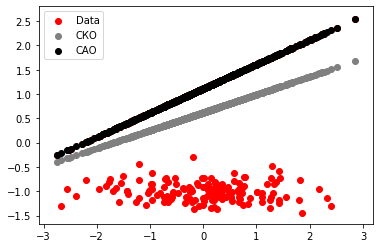

In [22]:
plt.scatter(dataset_x, dataset_y,color='red',label='Data')
plt.scatter(dataset_x, result_appended_sco.x[0]*dataset_x + result_appended_sco.x[1],color = 'grey',label='СКО')
plt.scatter(dataset_x, result_appended_abso.x[0]*dataset_x + result_appended_abso.x[1],color='black',label='САО')
plt.legend(loc='best')

$\begin{align}
& (1\ балла)\ 5.\ На\ основе\ полученных\ графиков\ сделайте\ вывод\ об\ устойчивости\ моделей,\ оптимизирующих\ среднеквадратическое\\ & отклонение\ и\ среднее\ абсолютное\ отклонение,\ к\ выбросам.
\end{align}$

# Ответ
Модель, минимизирующая среднеквадратическое отклонение оказалась неустойчива к выбросам.
Минимизация среднего абсолютного отклонения оказалась устойчивой к выбросам.

$
\begin{align}
(4\ балла)\ 6.\ Реализуйте\ линейную\ регрессию\ (используйте\ векторизованные\ операции\ из\ библиотеки\ numpy)
\end{align}$

$
\begin{align}
Пример\ векторизованных\ операций
\end{align}$

In [13]:
import numpy as np
# Пример: скалярное произведение векторов
vec1 = np.random.randn(10000,)
vec2 = np.random.randn(10000,)
print(vec1.shape)
print(vec1 @ vec2)

(10000,)
-247.3412194277384


In [16]:
# С использованием цикла
prod = 0
for i in range(len(vec1)):
    prod += vec1[i] * vec2[i]

# С использованием векторизованных операций
prod_vect = vec1 @ vec2 # или np.dot(vec1, vec2)

print(np.isclose(prod, prod_vect))


True


$\begin{align}
Это\ нужно\ для\ ускорения\ вычислений
\end{align}$

In [17]:
%%time
# магическая команда (magic command) time выводит время исполнения ячейки

# матричное умножение с использованием циклов
m, n, l = 100, 500, 400
mat1 = np.random.randn(m, l)
mat2 = np.random.randn(l, n)
mat_res = np.zeros((m, n))
for i in range(mat_res.shape[0]):
    for j in range(mat_res.shape[1]):
        for k in range(mat1.shape[1]):
            mat_res[i, j] += mat1[i, k] * mat2[k, j]

Wall time: 47.7 s


In [18]:
%%time

# матричное умножение с использованием векторизованных операций
mat_res_vec = mat1 @ mat2

Wall time: 89 ms


In [19]:
print(np.allclose(mat_res, mat_res_vec))

True


$
\begin{align}
Проверка\  линейной\ регрессии
\end{align}$

$$
\nabla Q(\mathbf{w}) = -2X^TY + 2X^TX\mathbf{w} = 2X^T(X\mathbf{w} - Y).
$$

In [103]:
class MyLinearRegression:
    def __init__(self, n_iter=1000):
        self.w = 0.
        self.b = 0
        self.n_iter = n_iter # число итераций
        self.lambda_ = 0.01 # шаг градиентного спуска
        
    def fit(self, X, y):
        # инициализация весов модели   
        X = X.copy()
        X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)    
        self.w = np.array([[self.w],[self.b]])
        # напишите цикл, на каждом шаге которого
        # обновляются веса модели
        # начало кода
        for i in range(self.n_iter):
            self.w -= 2 * self.lambda_* np.dot(X.T, np.dot(X, self.w) - y)/len(X)
        # конец кода
    
    # напишите функцию ошибки
    # (среднеквадратическое отклонение)
    def loss(self, y_true, X):
        # начало кода
        ls =  ((y_true - self.predict(X))**2)/len(X)
        return ls
        # конец кода
          
    # напишите предсказание модели 
    def predict(self, X):
        z = X * self.w[1] + self.w[0] 
        return z
        # конец кода
    

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np


np.random.seed(2020)
x = np.linspace(0, 10, 500)
y = 0.5 * x + 1 + np.sqrt(0.2) * np.random.randn(500)
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=2020)
linear_model = MyLinearRegression()
linear_model.fit(X_train, y_train)
mse = mean_squared_error(y_test, linear_model.predict(X_test))
assert(mse < 0.19)

$
\begin{align}
7. \ Изобразите\ на\ одном\ графике\ прямую,\ получаемую\ вашей\ линейной\ регрессией,\ и\  исходные\  точки\  x,\ y
\end{align}$

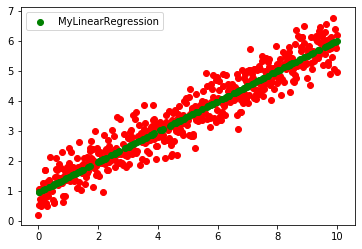

In [107]:
plt.scatter(x, y, color='red')
plt.scatter(X_test, linear_model.predict(X_test), color='green', label='MyLinearRegression')
plt.legend()